# Context and Defining Problem Statement

The data we have at hand is of passengers and their feedback regarding their flight experience. 

Each row is one passenger. Apart from the  feedback from the customers accross various attributes(15 in total) like food, online_support, cleanliness etc, we have data about the customers' age, loyalty to the airline, gender and class.

The target column is a binary variable which tells us if the customer is satisfied or neutral/dissatisfied

The task at hand is to analyze the data and build a model to predict customer satisfaction using all or some of the data we have.

# Steps - 
- Data loading and preprocessing
- Exploratory Data Analysis
- Model building and evaluation
- Model Tuning
- Implementing the process through Pipeline

# Data loading and preprocessing

### 1. Import Pandas, Numpy, pyplot and seaborn

In [3]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Not always recommended, but jsut so our notebook looks clean for this activity

### 2. Import the dataframes that are needed
- Import "Flight data_Train.csv" and "Surveydata_Train.csv"

In [4]:
df1 = pd.read_csv("Flight_data.csv")  # Read the data regarding customer attributes
df2 = pd.read_csv("Survey_data.csv")   # Feedback data from customers

In [5]:
df1.shape

(90917, 9)

In [6]:
df2.shape

(90917, 16)

### 3. Join the two dataframes using the 'id' column as the primary key
- Rename the Id column of one dataframe so that there "id" column name becomes same

In [7]:
df4 = df2.set_index("4")
df3 = df1.set_index("3")
df4

KeyError: "None of ['4'] are in the columns"

In [9]:
#Using pandas' Join method
#c = a.join(b)  # Joining two dfs on the 'Id' column

df = df2.set_index("Id").join(df1.set_index("ID"))


print(df.shape)
df.head()  # the combined dataframe

(90917, 23)


,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,neutral or dissatisfied,poor,acceptable,acceptable,manageable,poor,need improvement,poor,poor,acceptable,...,need improvement,poor,Male,Loyal Customer,30,Business travel,Business,1354,11,8.0
193378,satisfied,excellent,need improvement,excellent,Convinient,acceptable,excellent,acceptable,acceptable,good,...,excellent,acceptable,Female,disloyal Customer,20,NaN,Business,1439,6,0.0
174522,satisfied,good,good,good,manageable,acceptable,excellent,excellent,need improvement,need improvement,...,need improvement,excellent,Female,NaN,55,Personal Travel,Eco Plus,976,4,0.0
191830,satisfied,good,good,good,manageable,poor,good,poor,poor,poor,...,acceptable,poor,Male,disloyal Customer,24,Business travel,Eco,2291,0,0.0
221497,satisfied,good,good,NaN,Convinient,good,good,good,good,good,...,good,good,Male,Loyal Customer,32,Business travel,Business,3974,0,0.0


### 4. Print the number of missing values in each of the columns

In [10]:
df.isna().sum() # Since True is 1 and False is 0, if you do a sum of a boolean dataframe, we get the number of trues in each col

Satisfaction                            0
Seat_comfort                            0
Departure.Arrival.time_convenient    8244
Food_drink                           8181
Gate_location                           0
Inflightwifi_service                    0
Inflight_entertainment                  0
Online_support                          0
Ease_of_Onlinebooking                   0
Onboard_service                      7179
Leg_room_service                        0
Baggage_handling                        0
Checkin_service                         0
Cleanliness                             0
Online_boarding                         0
Gender                                  0
CustomerType                         9099
Age                                     0
TypeTravel                           9088
Class                                   0
Flight_Distance                         0
DepartureDelayin_Mins                   0
ArrivalDelayin_Mins                   284
dtype: int64

In [11]:
# you can also find it using the snippet below
df.isnull().apply(pd.value_counts).fillna(0)

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
False,90917.0,90917.0,82673,82736,90917.0,90917.0,90917.0,90917.0,90917.0,83738,...,90917.0,90917.0,90917.0,81818,90917.0,81829,90917.0,90917.0,90917.0,90633
True,0.0,0.0,8244,8181,0.0,0.0,0.0,0.0,0.0,7179,...,0.0,0.0,0.0,9099,0.0,9088,0.0,0.0,0.0,284


### 5. Drop all the rows having atleast one missing values and check the shape of the dataframe before and after dropping the rows
- Fill null values in ArrivalDelayin_Mins with mean
- After that drop all the rows with null values

In [12]:
# There are a few columns where out of the total ~90k records, ~8k have missing value. Imputing them with a central tendency
# might add undesirable noise in the data. Hence, lets tackle only the columns that have less missing values.

# But before imputation let us check the distribution of the data. If there are outliers, we would prefer to impute with median
# else mean can be good option.


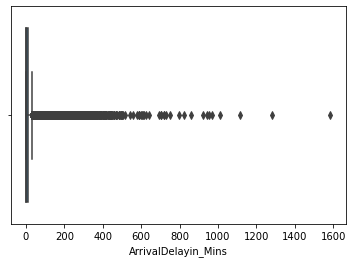

In [13]:
sns.boxplot(df['ArrivalDelayin_Mins'])

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,90917.0,39.447166,15.129794,7.0,27.0,40.0,51.0,85.0
Flight_Distance,90917.0,1981.629442,1026.779932,50.0,1360.0,1927.0,2542.0,6950.0
DepartureDelayin_Mins,90917.0,14.686593,38.669260,0.0,0.0,0.0,12.0,1592.0
ArrivalDelayin_Mins,90633.0,15.058930,39.038523,0.0,0.0,0.0,13.0,1584.0


In [15]:
# the above two analysis suggest that we are in for many outliers
# so let us use the median to impute the values
#df.ArrivalDelayin_Mins.fillna(df.ArrivalDelayin_Mins.median(), inplace = True)

# Alternate way - You can use the simpleimputer function of the sklearn.impute. You can try it out!
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median') 
df['ArrivalDelayin_Mins'] = imputer.fit_transform(df['ArrivalDelayin_Mins'].values.reshape(-1,1))

# Check
df.isna().sum()

Satisfaction                            0
Seat_comfort                            0
Departure.Arrival.time_convenient    8244
Food_drink                           8181
Gate_location                           0
Inflightwifi_service                    0
Inflight_entertainment                  0
Online_support                          0
Ease_of_Onlinebooking                   0
Onboard_service                      7179
Leg_room_service                        0
Baggage_handling                        0
Checkin_service                         0
Cleanliness                             0
Online_boarding                         0
Gender                                  0
CustomerType                         9099
Age                                     0
TypeTravel                           9088
Class                                   0
Flight_Distance                         0
DepartureDelayin_Mins                   0
ArrivalDelayin_Mins                     0
dtype: int64

In [16]:
# Rest other missing values are filled with not_captured.
#It can be done in other way also or also can be dropped according to the problem and business context.
df.dropna(inplace = True)
df.shape

(53798, 23)

# Exploratory Data Analysis

### 6. Print correlation

In [17]:
cor = df.corr() # It will show correlation of only numerical variables here.

In [18]:
cor

,Age,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Age,1.000000,-0.250969,-0.009865,-0.010919
Flight_Distance,-0.250969,1.000000,0.110827,0.108107
DepartureDelayin_Mins,-0.009865,0.110827,1.000000,0.962182
ArrivalDelayin_Mins,-0.010919,0.108107,0.962182,1.000000


- There is just one obvious correlation that we can see that is between arrival delay and departure delay. We can drop one of the variables here

In [19]:
to_drop = ['DepartureDelayin_Mins']

### Feedback columns
Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink', 'Gate_location',
'Inflightwifi_service', 'Inflight_entertainment', 'Online_support',
'Ease_of_Onlinebooking', 'Onboard_service', 'Leg_room_service',
'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding'

### 7. Manually encode these variables(printed above) such that they follow an order based on the meaning. 

In [20]:
# Manual label encoding
df.replace({'extremely poor' : 0, 'poor' : 1, 'need improvement' : 2, 'acceptable' : 3, 
            'good' : 4, 'excellent' : 5}, inplace = True)  

df.replace({'very inconvinient' : 0, 'Inconvinient' : 1, 'need improvement' : 2, 'manageable' : 3,
            'Convinient' : 4, 'very convinient' : 5}, inplace = True)

In [21]:
# check for encodings
df['Departure.Arrival.time_convenient'].value_counts()

4    12166
5    11123
3     9656
2     9554
1     8559
0     2740
Name: Departure.Arrival.time_convenient, dtype: int64

### 8. Display countplot of every feedback attribute with respect to Customer Satisfaction. 

You can use sns.countplot and set hue  = 'Satisfaction'

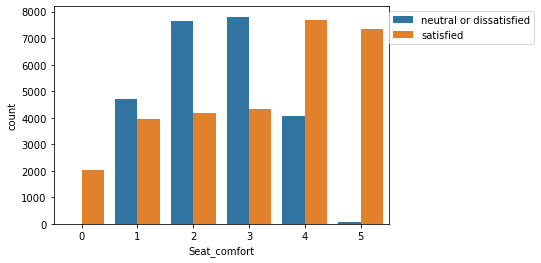

In [22]:
# We can use seaborn's countplot to plot a stacked baatchart
sns.countplot(df.Seat_comfort, hue = df.Satisfaction) 
plt.legend(loc = 'upper right', bbox_to_anchor=(1.45, 1))   # to place the legend in a 'good' position

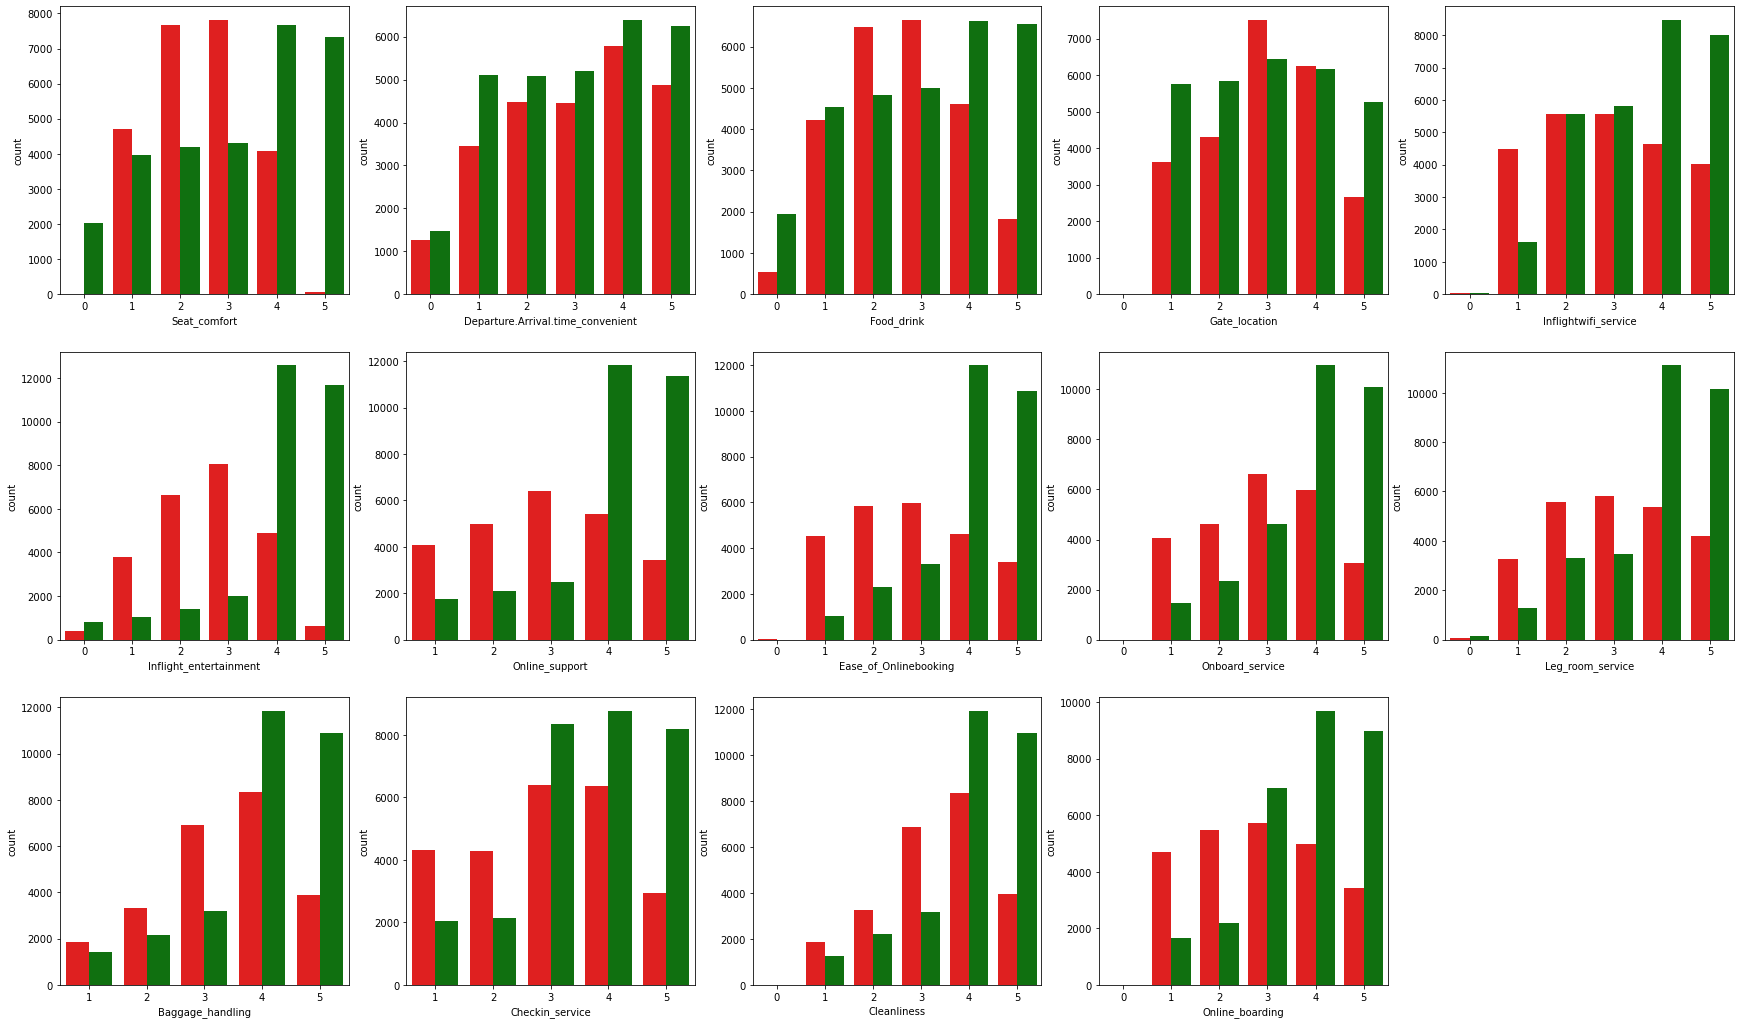

In [23]:
# Since there are a lot of columns that we want to plot, we can put all of them 
# in one plot by using subplot() Additionally, since there are a lot of subplots 
# that need to be plotted, we can use a for loop

plt.figure(figsize= (30,18))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
feedback = [ 'Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
           'Gate_location', 'Inflightwifi_service','Inflight_entertainment',
           'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
           'Leg_room_service', 'Baggage_handling','Checkin_service', 
            'Cleanliness', 'Online_boarding']

for i in feedback:
    plt.subplot(3, 5, pos)
    sns.countplot(df[i], hue = df.Satisfaction,
                  palette = {'satisfied':'green','neutral or dissatisfied': 'red'})
    plt.legend().remove()  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one   

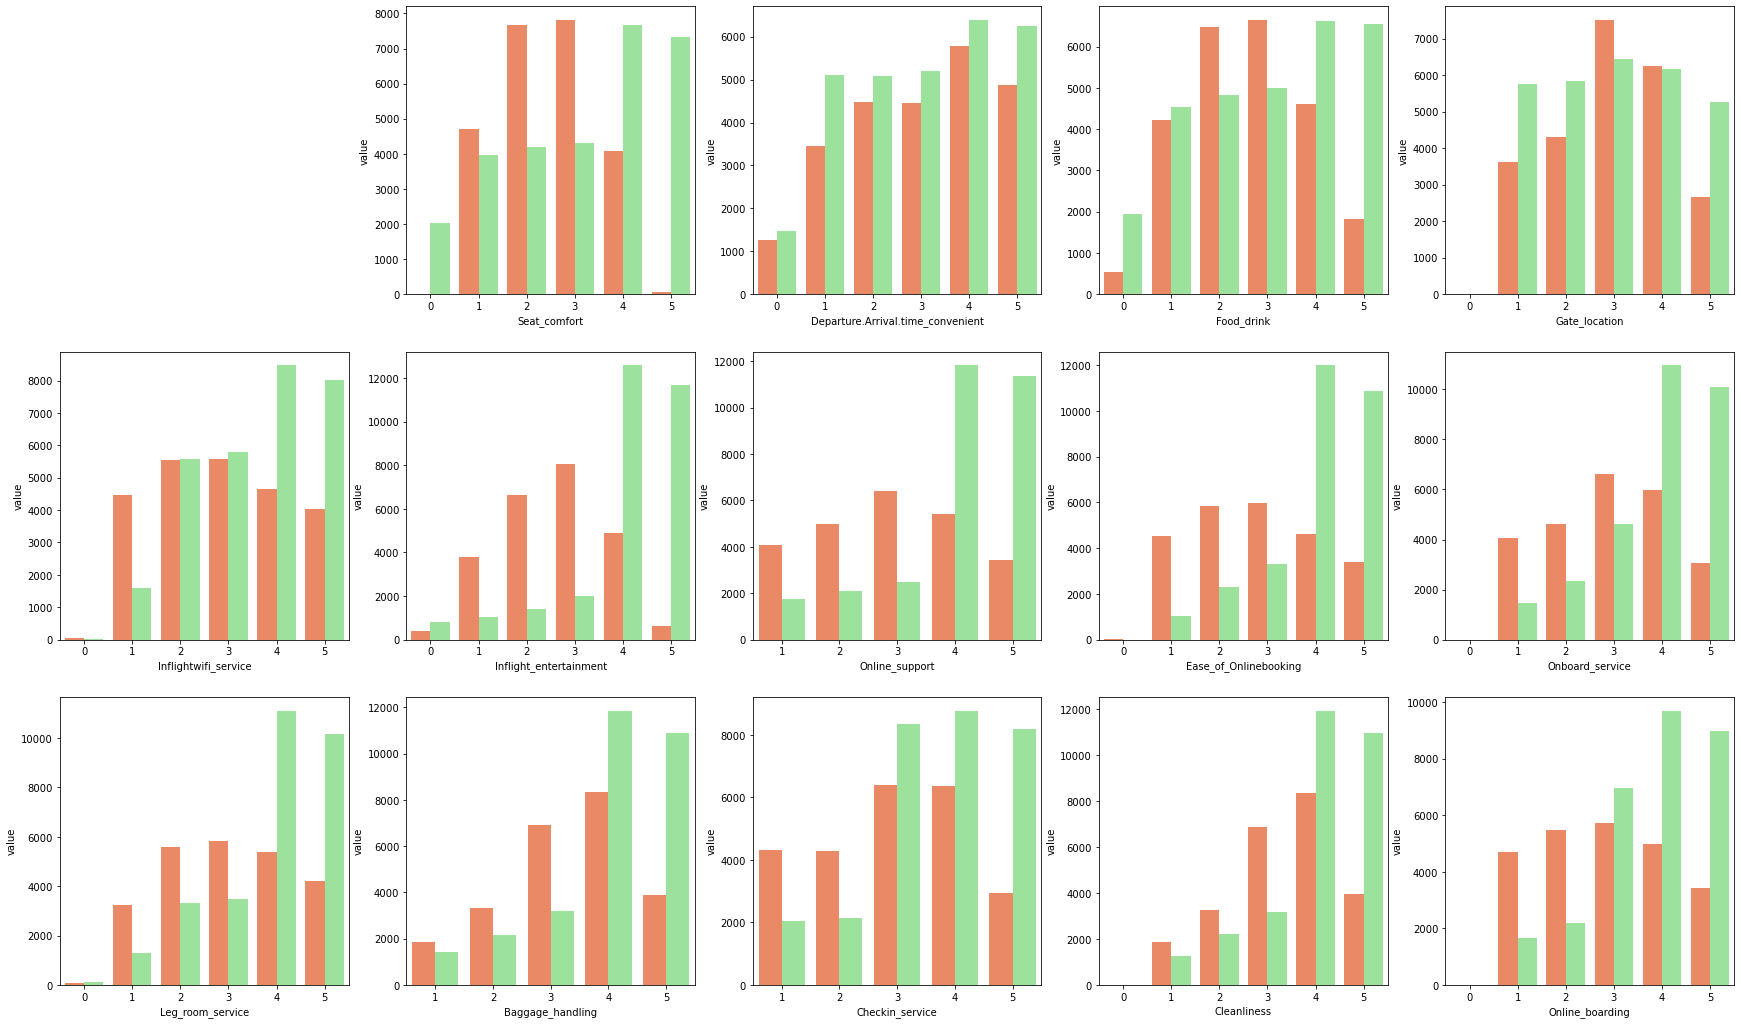

In [24]:
# Alternate way
# Using sns.barplot()

plt.figure(figsize= (30,18))  
pos = 2  

for i in feedback:
    ct = pd.crosstab(df[i], df.Satisfaction)  # Crosstab 
    stacked =ct.stack().reset_index().rename(columns={0:'value'}) #dataframe with name and count accross satisfaction levels
    plt.subplot(3, 5, pos)
    sns.barplot(x=stacked[i], y=stacked.value, hue=stacked.Satisfaction,
               palette = {'satisfied':'lightgreen','neutral or dissatisfied': 'coral'}) # Barplot
    plt.legend().remove()  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one    

### 9. Draw all the insights that you can from the plots

**Green and orange bars are counts of satisfied and dissatisfied customers respectively. We want to look for areas where there is a visually significant difference between the length of the stacked bars**

- From the plots above,
    - Seating comfort can cause high levels of satisfaction to customers. Hardly any people who rated highly for seat_comfort were dissatisfied
    - A similar case with respect to inflight_entertainment. In this case, having less entertainment seems to have caused far more dissatisfaction compared to bad seating.
    - Difference is observed in ease_of_online_booking quiet evidently

### 10. Print the average feedback score
- When Satisfaction columns equals 'satisfied'
- When Satisfaction columns is not equal to 'satisfied'

In [25]:
Feedback_cols = ['Seat_comfort', 'Departure.Arrival.time_convenient',
                 'Food_drink', 'Gate_location', 'Inflightwifi_service',
                 'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking', 
                 'Onboard_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service',
                 'Cleanliness', 'Online_boarding']

In [26]:
df.groupby('Satisfaction').mean() # Average rating of individual feedback attributes across satisfaction levels


,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Age,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Satisfaction,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,2.469468,3.015667,2.659690,3.000864,2.922571,2.61820,2.963691,2.855216,2.972573,3.061598,3.370040,2.971504,3.380484,2.875529,37.451334,2028.216251,18.005181,18.562400
satisfied,3.142271,2.970793,3.001153,2.977238,3.530004,4.01557,3.983751,3.996981,3.875912,3.852641,3.972896,3.641100,3.985651,3.750161,41.018590,1943.874894,12.120052,12.241256


### 11. Draw any insights that you can from the above values

- Observe the Exreme values (lower side for 'dissatisfaction' and higher side for 'satisfaction')
- Bad seats are a strong cause for customer dissatisfication
- Time convenience doesn't seem to be that big of a deal
- Dissatisfied customers had some bad experiences with food but average food seems to satisfy most people
- Gate location is totally irrelevant
- Wifi is quiet a factor. On an average, having good wifi yeilded customer satisfaction
- Easy online booking facility seems to be very important for customer satisfaction
- In flight entertainment seems to be a deal breaker

### 12. Create a new column which is the mean of 'Ease_of_Onlinebooking', 'Online_boarding', 'Online_support' and name it "avg_feedback_of_online_services". 

DIY : If online services has a bad ratings then what is the average ratings of other feedback attributes? 
And how does it impact Final Satisfaction of customers?

In [27]:
online_df = df.loc[:, ['Ease_of_Onlinebooking', 'Online_boarding', 'Online_support']]
online_df['avg_feedback_of_online_services'] = online_df.mean(axis = 1)
online_df #['avg_feedback_of_online_services'].value_counts()

,Ease_of_Onlinebooking,Online_boarding,Online_support,avg_feedback_of_online_services
Id,,,,
198671,1,1,1,1.000000
191830,1,1,1,1.000000
228137,4,3,5,4.000000
240081,4,5,5,4.666667
233692,5,3,5,4.333333
...,...,...,...,...
240287,5,4,5,4.666667
177814,4,3,4,3.666667
181405,3,3,3,3.000000


# Model building and evaluation

### 14. Encode the columns "Gender", "CustomerType", "TypeTravel", "Class", "Satisfaction" 
- Use manual encoding or other type of encoding

In [28]:
df.dtypes

Satisfaction                          object
Seat_comfort                           int64
Departure.Arrival.time_convenient      int64
Food_drink                             int64
Gate_location                          int64
Inflightwifi_service                   int64
Inflight_entertainment                 int64
Online_support                         int64
Ease_of_Onlinebooking                  int64
Onboard_service                        int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Cleanliness                            int64
Online_boarding                        int64
Gender                                object
CustomerType                          object
Age                                    int64
TypeTravel                            object
Class                                 object
Flight_Distance                        int64
DepartureDelayin_Mins                  int64
ArrivalDel

In [29]:
# Number of classes in each of the categorical attributes
for i in df.columns:
    if df[i].dtype == 'O':
        print("---")
        print(i, '->', len(df[i].value_counts()))
        print(df[i].value_counts())

---
Satisfaction -> 2
satisfied                  29479
neutral or dissatisfied    24319
Name: Satisfaction, dtype: int64
---
Gender -> 2
Female    27447
Male      26351
Name: Gender, dtype: int64
---
CustomerType -> 2
Loyal Customer       44031
disloyal Customer     9767
Name: CustomerType, dtype: int64
---
TypeTravel -> 2
Business travel    37084
Personal Travel    16714
Name: TypeTravel, dtype: int64
---
Class -> 3
Business    25718
Eco         24156
Eco Plus     3924
Name: Class, dtype: int64


In [30]:
#Manuanl Encoding
df.replace({'Loyal Customer' : 1, 'disloyal Customer' : 0,
            'Business travel' : 1, 'Personal Travel' : 0,
            'Female' : 0, 'Male' : 1,
            'satisfied' : 1, 'neutral or dissatisfied' : 0, 
            'Eco Plus': 0 , 'Eco': 1, 'Business': 2}, inplace = True)

In [31]:
#onehotencoding
df_coded = pd.get_dummies(df)

In [32]:
df_coded.columns

Index(['Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Class', 'Flight_Distance',
       'DepartureDelayin_Mins', 'ArrivalDelayin_Mins'],
      dtype='object')

In [33]:
df_coded.head()

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,0,1,3,3,3,1,2,1,1,3,...,2,1,1,1,30,1,2,1354,11,8.0
191830,1,4,4,4,3,1,4,1,1,1,...,3,1,1,0,24,1,1,2291,0,0.0
228137,1,5,5,5,5,3,5,5,4,4,...,4,3,1,1,47,1,2,657,0,0.0
240081,1,1,1,1,1,5,5,5,4,2,...,3,5,0,1,30,1,2,5342,140,125.0
233692,1,1,1,1,1,2,5,5,5,5,...,5,3,1,1,58,1,2,351,0,0.0


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Satisfaction,53798.0,0.547957,0.497699,0.0,0.0,1.0,1.0,1.0
Seat_comfort,53798.0,2.838135,1.394441,0.0,2.0,3.0,4.0,5.0
Departure.Arrival.time_convenient,53798.0,2.991078,1.524952,0.0,2.0,3.0,4.0,5.0
Food_drink,53798.0,2.846797,1.443158,0.0,2.0,3.0,4.0,5.0
Gate_location,53798.0,2.987918,1.305901,0.0,2.0,3.0,4.0,5.0
Inflightwifi_service,53798.0,3.255418,1.320235,0.0,2.0,3.0,4.0,5.0
Inflight_entertainment,53798.0,3.383899,1.340946,0.0,2.0,4.0,4.0,5.0
Online_support,53798.0,3.522640,1.307606,1.0,3.0,4.0,5.0,5.0
Ease_of_Onlinebooking,53798.0,3.480854,1.305044,0.0,2.0,4.0,5.0,5.0
Onboard_service,53798.0,3.467564,1.270305,0.0,3.0,4.0,4.0,5.0


# Scaling

In [35]:
df_coded.columns

Index(['Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Class', 'Flight_Distance',
       'DepartureDelayin_Mins', 'ArrivalDelayin_Mins'],
      dtype='object')

In [36]:
#Here we are going to use StandardScaler to scale our data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#What all columns to scale? I have preferred all columns except onehotencoded columns 
# and target columns as scaling of target feature will not change anything as they 
# already have values like 0 and 1 only. You may only scale numerical features and 
# leave categorical features as required according to business problem need and results.

cols_to_scale = ['Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Age', 'Flight_Distance','DepartureDelayin_Mins', 'ArrivalDelayin_Mins']

# df_coded[cols_to_scale] = scaler.fit_transform(df_coded[cols_to_scale].to_numpy())
df_coded[cols_to_scale] = scaler.fit_transform(df_coded[cols_to_scale])

In [37]:
df_coded.head()

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,0,-1.318200,0.005851,0.106159,0.009252,-1.708362,-1.032041,-1.929223,-1.900992,-0.368075,...,-1.494290,-1.813728,1,1,-0.623525,1,2,-0.610957,-0.097471,-0.181435
191830,1,0.833219,0.661615,0.799090,0.009252,-1.708362,0.459457,-1.929223,-1.900992,-1.942515,...,-0.621503,-1.813728,1,0,-1.021264,1,1,0.300613,-0.381089,-0.385908
228137,1,1.550359,1.317380,1.492021,1.540776,-0.193466,1.205206,1.129831,0.397803,0.419144,...,0.251284,-0.273270,1,1,0.503402,1,2,-1.289040,-0.381089,-0.385908
240081,1,-1.318200,-1.305678,-1.279703,-1.522272,1.321430,1.205206,1.129831,0.397803,-1.155295,...,-0.621503,1.267188,0,1,-0.623525,1,2,3.268809,3.228596,2.808971
233692,1,-1.318200,-1.305678,-1.279703,-1.522272,-0.950914,1.205206,1.129831,1.164068,1.206364,...,1.124071,-0.273270,1,1,1.232591,1,2,-1.586736,-0.381089,-0.385908


In [38]:
df_coded.describe().T

,count,mean,std,min,25%,50%,75%,max
Satisfaction,53798.0,5.479572e-01,0.497699,0.000000,0.000000,1.000000,1.000000,1.000000
Seat_comfort,53798.0,2.008678e-16,1.000009,-2.035339,-0.601060,0.116080,0.833219,1.550359
Departure.Arrival.time_convenient,53798.0,-1.487610e-16,1.000009,-1.961443,-0.649914,0.005851,0.661615,1.317380
Food_drink,53798.0,2.650147e-16,1.000009,-1.972635,-0.586772,0.106159,0.799090,1.492021
Gate_location,53798.0,9.794023e-17,1.000009,-2.288034,-0.756510,0.009252,0.775014,1.540776
Inflightwifi_service,53798.0,1.889719e-16,1.000009,-2.465810,-0.950914,-0.193466,0.563982,1.321430
Inflight_entertainment,53798.0,2.613857e-16,1.000009,-2.523540,-1.032041,0.459457,0.459457,1.205206
Online_support,53798.0,-5.318001e-16,1.000009,-1.929223,-0.399696,0.365067,1.129831,1.129831
Ease_of_Onlinebooking,53798.0,1.839324e-16,1.000009,-2.667257,-1.134727,0.397803,1.164068,1.164068
Onboard_service,53798.0,4.397224e-16,1.000009,-2.729734,-0.368075,0.419144,0.419144,1.206364


In [39]:
df_coded.head()

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,0,-1.318200,0.005851,0.106159,0.009252,-1.708362,-1.032041,-1.929223,-1.900992,-0.368075,...,-1.494290,-1.813728,1,1,-0.623525,1,2,-0.610957,-0.097471,-0.181435
191830,1,0.833219,0.661615,0.799090,0.009252,-1.708362,0.459457,-1.929223,-1.900992,-1.942515,...,-0.621503,-1.813728,1,0,-1.021264,1,1,0.300613,-0.381089,-0.385908
228137,1,1.550359,1.317380,1.492021,1.540776,-0.193466,1.205206,1.129831,0.397803,0.419144,...,0.251284,-0.273270,1,1,0.503402,1,2,-1.289040,-0.381089,-0.385908
240081,1,-1.318200,-1.305678,-1.279703,-1.522272,1.321430,1.205206,1.129831,0.397803,-1.155295,...,-0.621503,1.267188,0,1,-0.623525,1,2,3.268809,3.228596,2.808971
233692,1,-1.318200,-1.305678,-1.279703,-1.522272,-0.950914,1.205206,1.129831,1.164068,1.206364,...,1.124071,-0.273270,1,1,1.232591,1,2,-1.586736,-0.381089,-0.385908


In [40]:
df = df_coded

### 15. Seperate the column "Satisfaction" from the rest of the columns
- Create X and y

In [41]:
# We are going to drop highly correlated feature which we have 
# found before as there features might affect our models - to_drop

In [42]:
# Seperating the target and the rest X = df.drop(columns= ['Satisfaction'])
X = df.drop(columns= ['Satisfaction', 'DepartureDelayin_Mins'])  
y = df.Satisfaction

### 16. Create train and test datasets
- Use train_test_split

In [43]:
# Splitting the data for training and testing out model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, stratify = y)

In [44]:
100*y_train.value_counts(normalize=True)

1    54.795777
0    45.204223
Name: Satisfaction, dtype: float64

In [45]:
100*y_test.value_counts(normalize=True)

1    54.795539
0    45.204461
Name: Satisfaction, dtype: float64

In [46]:
X_train.dtypes

Seat_comfort                         float64
Departure.Arrival.time_convenient    float64
Food_drink                           float64
Gate_location                        float64
Inflightwifi_service                 float64
Inflight_entertainment               float64
Online_support                       float64
Ease_of_Onlinebooking                float64
Onboard_service                      float64
Leg_room_service                     float64
Baggage_handling                     float64
Checkin_service                      float64
Cleanliness                          float64
Online_boarding                      float64
Gender                                 int64
CustomerType                           int64
Age                                  float64
TypeTravel                             int64
Class                                  int64
Flight_Distance                      float64
ArrivalDelayin_Mins                  float64
dtype: object

### 17. Print accuracy
- Print accuracy on test data using below models
- Logistic regression model trained using all the attributes
- Logistic regression model trained using only the feedback columns
- Decision tree model trained using all the attributes
- Random forest model trained using all the attributes

Logistic Regression

In [48]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression #importing logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)  # Predictions from logistic regression
score1 = lr.score(X_test, y_test)
print(f'Number of features used = {len(X_train.columns)}')
print(f'Accuracy in predicting customer satisfaction = {score1}')

Number of features used = 21
Accuracy in predicting customer satisfaction = 0.8359851301115242


Predicting customer satisfaction solely based on the feedback

In [50]:
feedback

['Seat_comfort',
 'Departure.Arrival.time_convenient',
 'Food_drink',
 'Gate_location',
 'Inflightwifi_service',
 'Inflight_entertainment',
 'Online_support',
 'Ease_of_Onlinebooking',
 'Onboard_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding']

In [51]:
#Logistic Regression with only feedback columns
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,feedback], 
                                                    y, 
                                                    random_state = 1, 
                                                    stratify = y)
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
score2 = lr.score(X_test, y_test)

print(f'Number of features used = {len(X_train.columns)}')
print(f'Accuracy of predicting satisfaction based on the feedback = {score2}')

Number of features used = 14
Accuracy of predicting satisfaction based on the feedback = 0.8050557620817844


Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
score3 = dt.score(X_test, y_test)
pred = dt.predict(X_test)
print(f"Decision tree acccuracy score: {score3}")

Decision tree acccuracy score: 0.9324907063197027


Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
score4 = rf.score(X_test, y_test)
print(f'Random Forest accuracy score = {score4}')

Random Forest accuracy score = 0.953457249070632


### 18. Print feature importance
- Print feature importance of Random Forest



In [54]:
#Decision Tree 
pd.Series(dt.feature_importances_, X_train.columns ).sort_values(ascending= False)

Inflight_entertainment               0.386742
Seat_comfort                         0.179743
Ease_of_Onlinebooking                0.069936
CustomerType                         0.049504
TypeTravel                           0.037511
Flight_Distance                      0.030623
Age                                  0.026852
Class                                0.022420
Gate_location                        0.022338
Departure.Arrival.time_convenient    0.020731
Online_support                       0.020522
Checkin_service                      0.018482
ArrivalDelayin_Mins                  0.017327
Baggage_handling                     0.016304
Gender                               0.015761
Leg_room_service                     0.015517
Cleanliness                          0.014540
Onboard_service                      0.011024
Online_boarding                      0.008519
Inflightwifi_service                 0.008144
Food_drink                           0.007459
dtype: float64

In [55]:
#RandomForest Easy Way
#pd.Series(rf.feature_importances_, X_train.columns).sort_values(ascending= False)
#RandomForest Sweet Way
pd.DataFrame({'Attribute': X_train.columns, 'Importance': rf.feature_importances_}).sort_values('Importance', axis=0, ascending=False)

,Attribute,Importance
5,Inflight_entertainment,0.197335
0,Seat_comfort,0.131123
7,Ease_of_Onlinebooking,0.079050
6,Online_support,0.061934
15,CustomerType,0.045277
8,Onboard_service,0.041624
18,Class,0.041170
19,Flight_Distance,0.039684
2,Food_drink,0.039229
9,Leg_room_service,0.037251


# Model Tuning

### 19. Print cross validation score
- Decision tree model trained using all the attributes
- Random Forest model trained using all the attributes
- Fine tuned (using Grid Search or Random Search) Random Forest model

**Display all the scores above with their respective models in a single dataframe**



Cross Validation Score

In [56]:
# For Decision Tree dt
from sklearn.model_selection import cross_val_score
score5 = cross_val_score(dt, X, y, cv = 10).mean()
print(f'Cross validation score of Decision tree = {score5}')

Cross validation score of Decision tree = 0.9366517905582151


In [57]:
# For Random Forest rf
score6 = cross_val_score(rf, X, y, cv = 10).mean()
print(f'Cross validation score of Random forest = {score6}')

Cross validation score of Random forest = 0.954403469778866


Parameter Tuning Using GridDSearch

Doing it only for RandomForest as the mean CV score is better.

In [58]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
              'max_depth': [10, 20, 30, 40, 50],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4, 8],
              'n_estimators': [100]}

clf = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X, y)
clf.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 13.9min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed: 17.5min finished


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [59]:
rf = RandomForestClassifier(bootstrap= True,
                            max_depth= 40,
                            max_features= 'auto',
                            min_samples_leaf= 1,
                            n_estimators= 100)

score7 = cross_val_score(rf, X, y, cv = 5).mean()
score7    

0.9533439644720371

In [60]:
data = {'Technique' : ['Logistic Regression', 
                       'LR with only feedback columns', 
                       'Decision tree',
                       'Random forest', 
                       'DT CV',
                       'RF CV',
                       'Tuned RF CV'],
       'Score' : [score1, score2, score3, score4, score5, score6, score7]
       }
result = pd.DataFrame(data)
result

,Technique,Score
0,Logistic Regression,0.835985
1,LR with only feedback columns,0.805056
2,Decision tree,0.932491
3,Random forest,0.953457
4,DT CV,0.936652
5,RF CV,0.954403
6,Tuned RF CV,0.953344


# Pipeline - Automate and Simplify the process

In [61]:
!pip install category_encoders

In [62]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from category_encoders import OrdinalEncoder

numeric_features = ['Age', 'Flight_Distance', 'DepartureDelayin_Mins']
feedback_features = ['Seat_comfort', 'Departure.Arrival.time_convenient', 
                     'Food_drink', 'Gate_location', 'Inflightwifi_service',
                     'Inflight_entertainment', 'Online_support', 
                     'Ease_of_Onlinebooking', 'Onboard_service',
                     'Leg_room_service', 'Baggage_handling', 'Checkin_service',
                     'Cleanliness', 'Online_boarding']
other_cat_cols =  ['Gender', 'CustomerType', 'TypeTravel', 'Class']

#TRANSFORMERS
numeric_transformer = Pipeline( steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

feedback_feature_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='not_captured')),
    ('label_encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())])

other_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='not_captured')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('feed_col', feedback_feature_transformer, feedback_features),
        ('other_cat_col', other_cat_transformer, other_cat_cols )
    ])

In [63]:
#Adding into Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(bootstrap= True,
                                                            max_depth= 30,
                                                            max_features= 'auto',
                                                            min_samples_leaf= 1,
                                                            n_estimators= 100))])

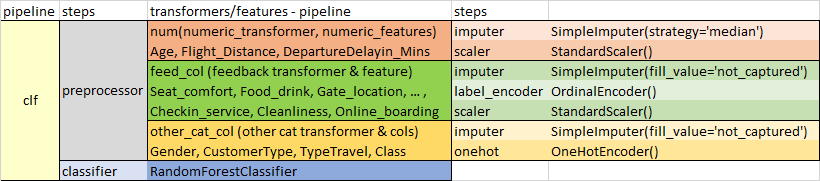

In [64]:
from IPython.display import Image
Image('pipeline.png')

In [65]:
#Taking the raw data
data = df2.set_index("Id").join(df1.set_index("ID"))
data

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,neutral or dissatisfied,poor,acceptable,acceptable,manageable,poor,need improvement,poor,poor,acceptable,...,need improvement,poor,Male,Loyal Customer,30,Business travel,Business,1354,11,8.0
193378,satisfied,excellent,need improvement,excellent,Convinient,acceptable,excellent,acceptable,acceptable,good,...,excellent,acceptable,Female,disloyal Customer,20,NaN,Business,1439,6,0.0
174522,satisfied,good,good,good,manageable,acceptable,excellent,excellent,need improvement,need improvement,...,need improvement,excellent,Female,NaN,55,Personal Travel,Eco Plus,976,4,0.0
191830,satisfied,good,good,good,manageable,poor,good,poor,poor,poor,...,acceptable,poor,Male,disloyal Customer,24,Business travel,Eco,2291,0,0.0
221497,satisfied,good,good,NaN,Convinient,good,good,good,good,good,...,good,good,Male,Loyal Customer,32,Business travel,Business,3974,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152951,satisfied,extremely poor,good,extremely poor,Convinient,need improvement,excellent,good,good,good,...,good,acceptable,Female,NaN,46,Personal Travel,Eco,1143,0,0.0
220134,satisfied,poor,poor,poor,Inconvinient,good,excellent,excellent,good,good,...,good,good,Female,Loyal Customer,45,NaN,Business,3585,1,0.0
174403,satisfied,good,good,good,manageable,good,good,excellent,poor,poor,...,poor,excellent,Female,Loyal Customer,67,NaN,Eco,2563,3,2.0


In [66]:
#Getting X and y
X_pipe = data.drop(['Satisfaction', 'ArrivalDelayin_Mins'], axis = 1)
y_pipe = data['Satisfaction']

In [67]:
#Data Split
X_trains, X_tests, y_trains, y_tests = train_test_split(X_pipe, y_pipe, stratify = y_pipe)

In [68]:
#Fitting Pipeline
clf.fit(X_trains, y_trains)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight_Distance',
                                                   'DepartureDelayin_Mins']),
                                                 ('feed_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='not_captured',
                                                                                 strategy='constant')),
                                                          

In [69]:
#Getting score
clf.score(X_tests, y_tests)

0.9337576192183579

# Conclusion:

- Given some data, we have seen how to perform EDA for that dataset
- The data that we had was not entirely continuous or categorical. Hence we improvised the analysis to draw insights
- We used the same old bar-charts but the way we interpreted is unique to this problem
- Beyond EDA, we have seen how to preprocess data and train Supervised Models with it
- We finally put all the steps in one place and built a pipeline using the Sklearn's Pipeline function

# Explore:

- You can cluster different segments of customer to get more insights about their behaviours.
- Create new features and select the best features to improve your model further.


In [70]:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight_Distance',
                                                   'DepartureDelayin_Mins']),
                                                 ('feed_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='not_captured',
                                                                                 strategy='constant')),
                                                                  ('label_encoder',
                                                                   OrdinalEncoder()),
                                                                  (...
                                                   'Leg_room_service',
                                                   'Baggage_handling',
                                                   'Checkin_service',
                                                   'Cleanliness',
                                                   'Online_boarding']),
                                                 ('other_cat_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='not_captured',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'CustomerType',
                                                   'TypeTravel', 'Class'])])),
                ('classifier', RandomForestClassifier(max_depth=30))])

SyntaxError: invalid syntax (<ipython-input-70-da1111fdf8ab>, line 16)